[캐글 문제](https://www.kaggle.com/competitions/titanic)
- Binary Classification 문제

[튜토리얼1](https://kaggle-kr.tistory.com/17?category=868316)<br>
[튜토리얼2](https://kaggle-kr.tistory.com/18)

- 캐글에 있는 여러 커널들을 참조하여 만들어진 튜토리얼

# 목표
타이타닉에 탑승한 사람들의 신상정보를 활용하여, 승선한 사람들의 생존여부를 예측하는 모델 생성

모델 생성을 위해 여러 시각화 도구(`matplotlib`, `seaborn`, `plotly`), 데이터 분석 도구(`pandas`, `numpy`), 머신러닝 도구(`sklearn`)을 사용할 예정

# 초기 설정

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale=2.5)

import set_matplotlib_hangul

# 프로세스
1. [데이터셋 확인](#데이터셋-확인)
2. [탐색적 데이터 분석(EDA)](#eda) <br>
    여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인<br>
    여러 시각화 툴을 사용하여 insight 를 얻음
3. [feature engineering](#feature-engineering)<br>
    모델 생성에 앞서, 모델의 성능을 높일 수 있도록 feature들을 engineering 함<br>
    ex. one-hot encoding, classification, 구간으로 나누기, 텍스트 데이터 처리
4. [model 생성](#building-machine-learning) <br>
    `sklearn` 을 사용해 모델 생성
    딥러닝을 위해 `tensorflow`, `pytorch` 등을 사용할 수도 있음
5. 모델 학습 및 예측 <br>
    `trainset`을 가지고 모델을 학습시킨 후, `testset` 을 가지고 예측
6. 모델 평가<br>
    예측 성능이 원하는 수준인지 판단

---

<br><br>
<a id="데이터셋-확인"></a>
# 데이터셋 확인
- 캐글에서 데이터셋은 보통 train, testset으로 나뉘어져 있음

In [20]:
df_train = pd.read_csv("./data/titanic/train.csv")
df_test = pd.read_csv("./data/titanic/test.csv")

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 문제의 Goal
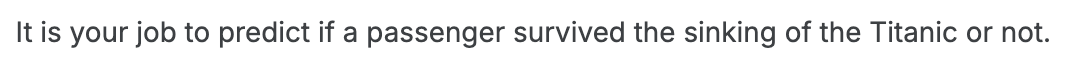

-> 예측하려는 target label은 `Survived`

## 컬럼(feature) 확인

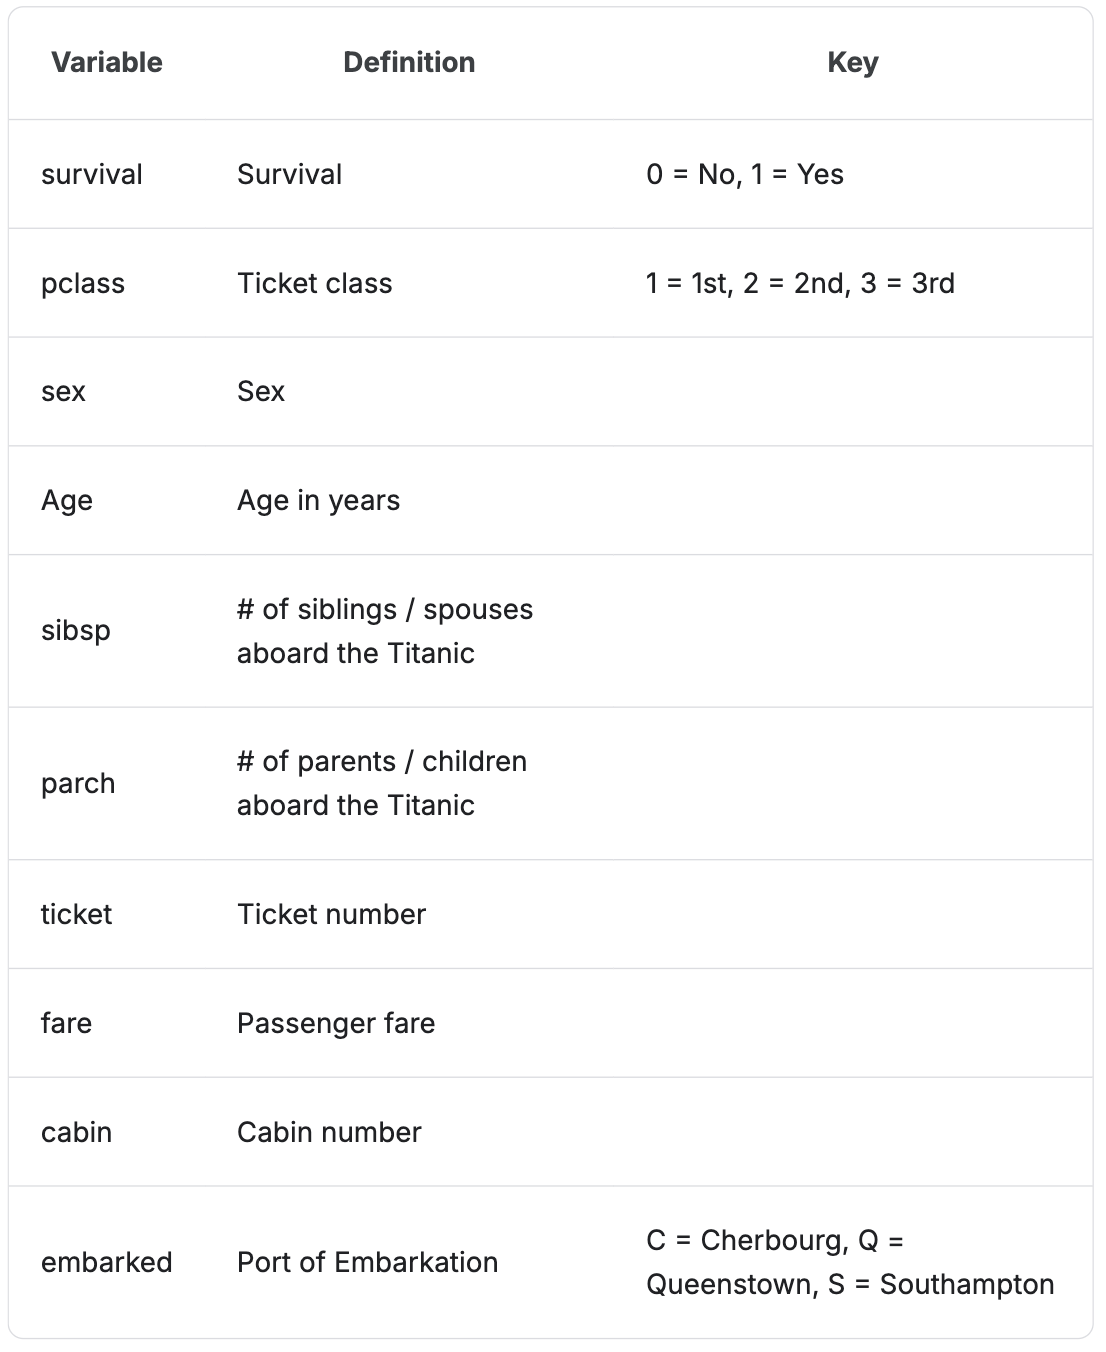

## 각 feature의 통계치 확인

In [22]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


컬럼로 count 가 다른 걸 보니, null data가 존재하는 컬럼(feature) 이 있는 것 같음

## Null Data Check

In [24]:
def null_data_check(df):
    for col in df.columns:
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(
            col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
        print(msg)

In [25]:
null_data_check(df_train)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [26]:
null_data_check(df_test)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<span style="background-color:yellow">`Age`, `Cabin`, `Embarked` feature 에만 null data 가 존재</span>

### MANO 라이브러리 
MANO 라이브러리를 사용하면 null data의 존재를 더 쉽게 볼 수 있음

In [27]:
import missingno as msno

In [28]:
def msno_matrix(df):
    msno.matrix(df=df.iloc[:,:], figsize=(8, 8), color=(0.8, 0.5, 0.2))

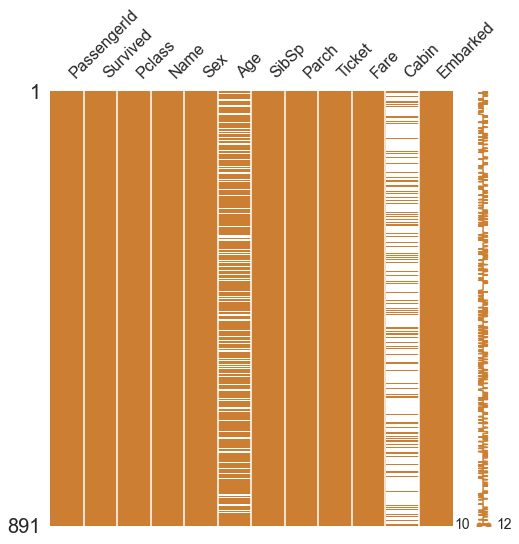

In [29]:
msno_matrix(df_train)

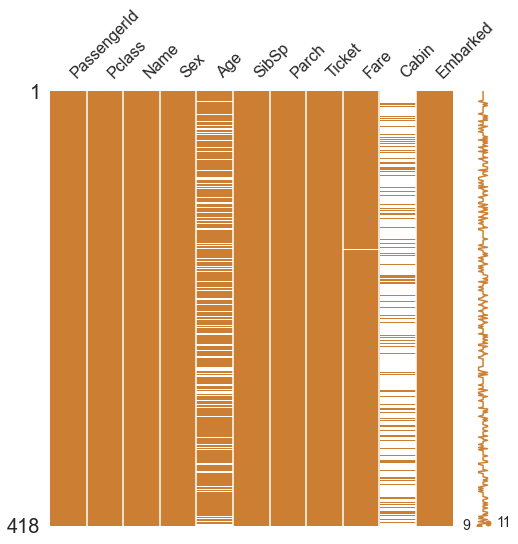

In [30]:
msno_matrix(df_test)

In [31]:
def msno_bar(df):
    msno.bar(df=df.iloc[:,:], figsize=(8, 8), color=(0.8, 0.5, 0.2))

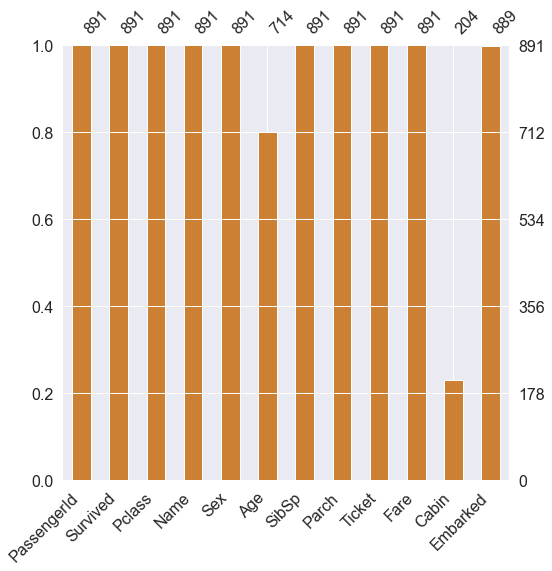

In [32]:
msno_bar(df_train)

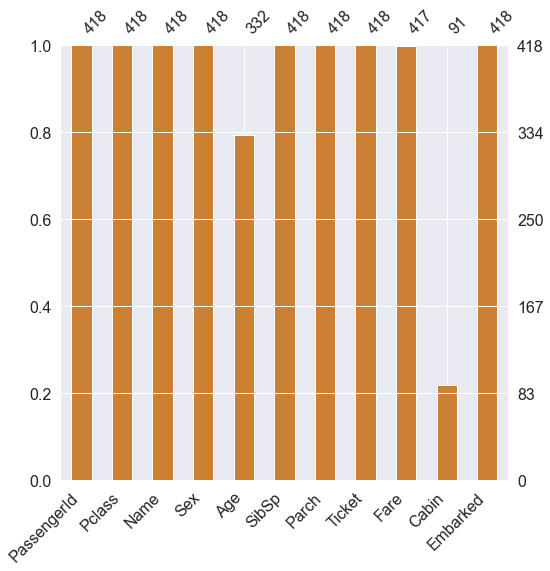

In [33]:
msno_bar(df_test)

## Target Label 확인
- target label 이 어떤 distribution 을 가지는지 확인
- 이 문제와 같은 Binary Classification 문제일 경우, 1과 0의 분포가 어떤지에 따라 모델의 평가 방법이 달라질 수 있음

In [34]:
target_label = 'Survived'

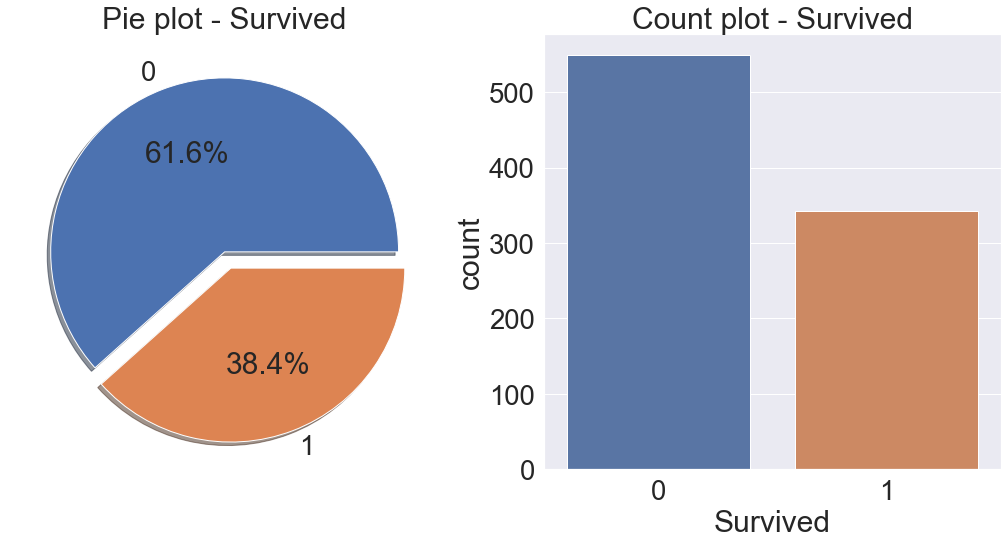

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[target_label].value_counts().plot.pie(
    explode = [0, 0.1], # 원점에서 Pie가 튀어나오는 정도(강조하고 싶을 때 사용)
    autopct='%1.1f%%',
    ax = ax[0], 
    shadow = True
)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4% 가 살아남음
- target label 의 분포가 제법 균일한 편(balanced)
- 만약 불균일하다면 -> 예를 들어, 1:99로 1에 치우친 경우, 모델이 모든 것을 1이라 해도 정확도가 99%가 나오게됨. 

<br><br>
<a id="eda"></a>
# EDA
- 데이터가 매우 많기 때문에, 숨겨진 사실을 찾기 위해선 적절한 시각화가 필요
- 시각화 라이브러리는 `matplotlib`, `seaborn`, `plotly` 등이 있음

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Pclass

- 카테고리 데이터
- 순서가 있는 데이터

### Pclass 에 따른 생존률 차이

#### 각 class 별 사람수

In [37]:
df_train[['Pclass', target_label]].groupby(
    ['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


#### 각 class 별 생존자 수

In [38]:
df_train[['Pclass', target_label]].groupby(
    ['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


#### pd.crosstab

- pandas의 crosstab을 사용하면 위의 과정을 좀 더 수월하게 볼 수 있음

In [39]:
pd.crosstab(
    df_train['Pclass'],
    df_train[target_label],
    margins=True
).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


#### 각 클래스별 생존률

<AxesSubplot:xlabel='Pclass'>

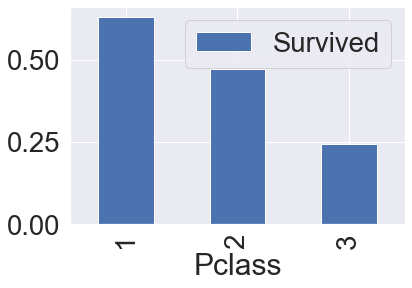

In [40]:
df_train[['Pclass', target_label]].groupby(
    ['Pclass'], as_index=True
).mean().sort_values(
    by=target_label, ascending=False
).plot.bar()

<b><span style="background-color:yellow">
Pclass가 높을수록(1st), 생존률이 높음
</span></b>

- seaborn 의 countplot 을 이용하여, 특정 label 에 따른 개수 확인

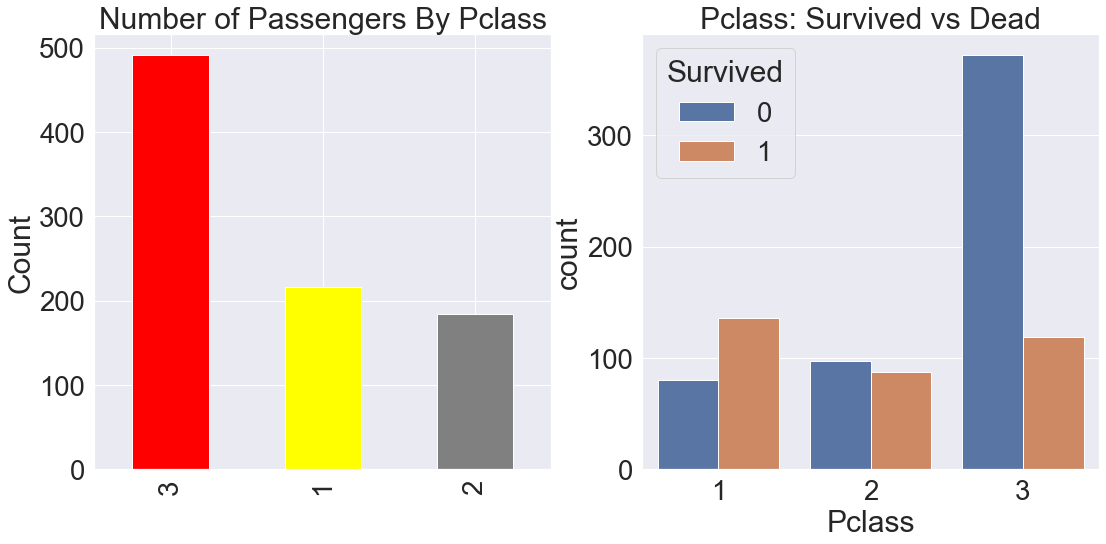

In [41]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(
    color = ["red", "yellow", "grey"],
    ax=ax[0]
)
ax[0].set_title(
    'Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(
    'Pclass', 
    hue=target_label, 
    data=df_train,
    ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

<b><span style="background-color:yellow">
Pclass가 높을수록, 생존 확률이 높음
</span></b>

## Sex

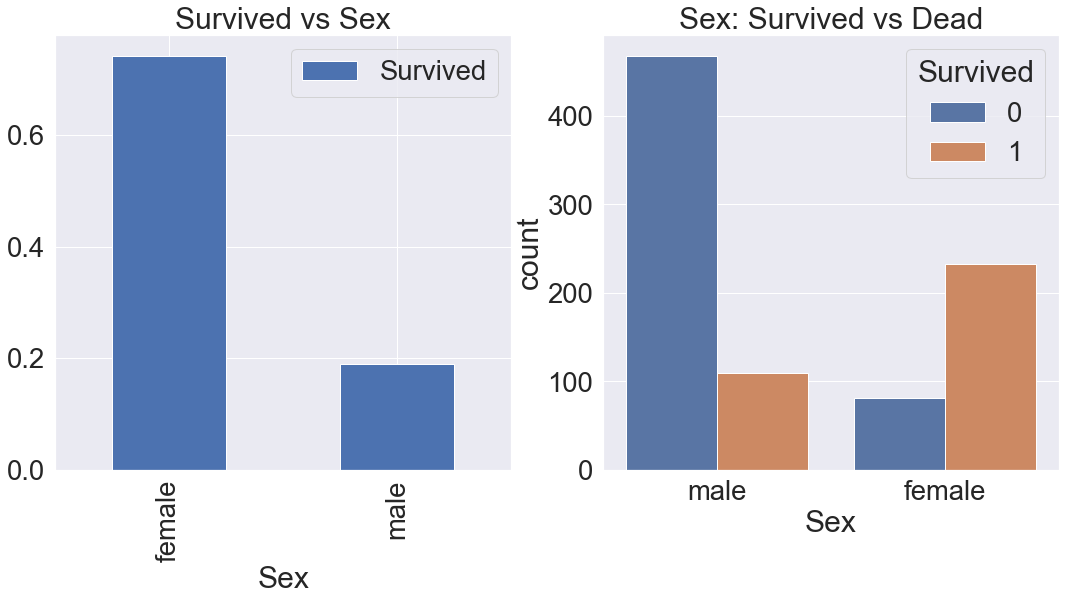

In [42]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', target_label]].groupby(
    ['Sex'], as_index=True
).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(
    'Sex', 
    hue=target_label, 
    data=df_train,
    ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

<span style="background-color:yellow">여자가 생존할 확률이높음</span>

In [43]:
df_train[['Sex', 'Survived']].groupby(
    ['Sex'], as_index=False
).mean().sort_values(by=target_label, ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [44]:
pd.crosstab(
    df_train['Sex'], df_train[target_label], margins=True
).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<span style="background-color:pink">여태까지의 분석으로는 Pclass, Sex 가 예측 모델에 쓰일 중요한 feature 임을 알 수 있다.</span>

## Both Sex and Pclass

### sns.factorplot 
- 3개의 차원으로 이루어진 그래프

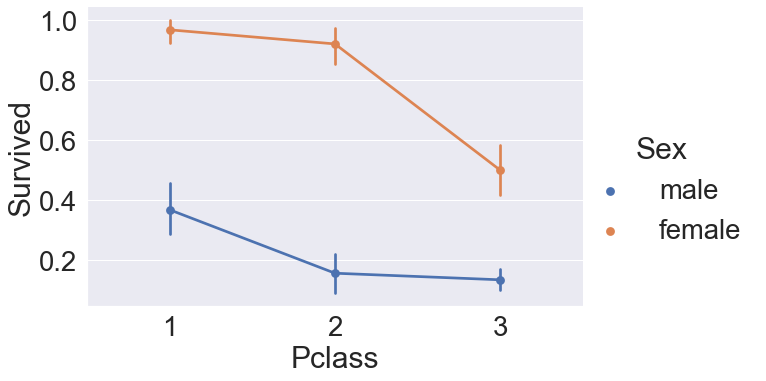

In [45]:
sns.factorplot(
    'Pclass', 
    target_label, 
    hue='Sex', 
    data = df_train,
    size=6,
    aspect=1.5
)

- 모든 Pclass 에서 female 이 살 확률이 male 보다 높음
- 성별 상관없이, Pclass가 높을수록 살 확률이 높음

## Age

In [46]:
print('제일 나이 많은 탐승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탐승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탐승객: 80.0 Years
제일 나이 어린 탐승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


### 생존에 따른 Age의 Histogram

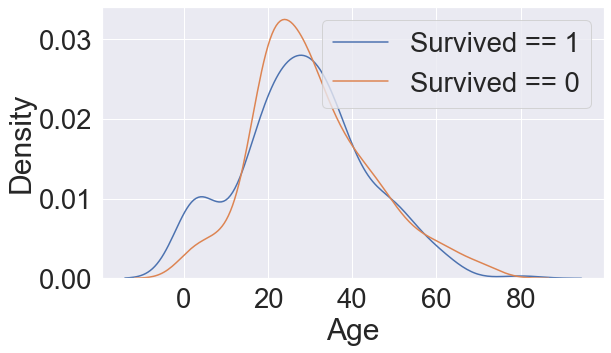

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train[target_label]==1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train[target_label]==0]['Age'], ax = ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<span style="background-color:yellow">
생존자 중 나이가 어린 경우가 많음
</span>

### 나이에 따른 Pclass 분포

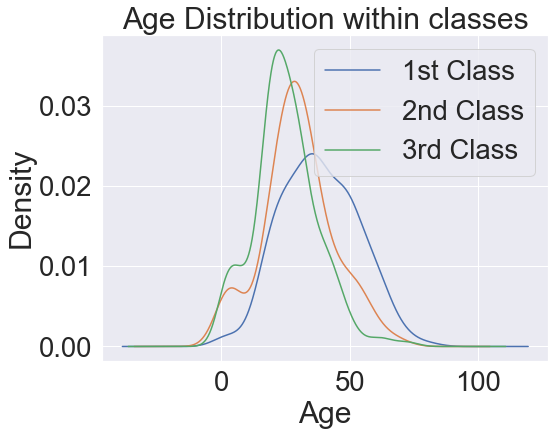

In [48]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Pclass 가 높을수록, 나이 많은 사람의 비중이 커짐

### 나이 범위별 생존률
- 나이대가 변화면서 생존률이 어떻게 되는지 확인
- 나이범위를 점점 넓혀가며, 생존률 확인

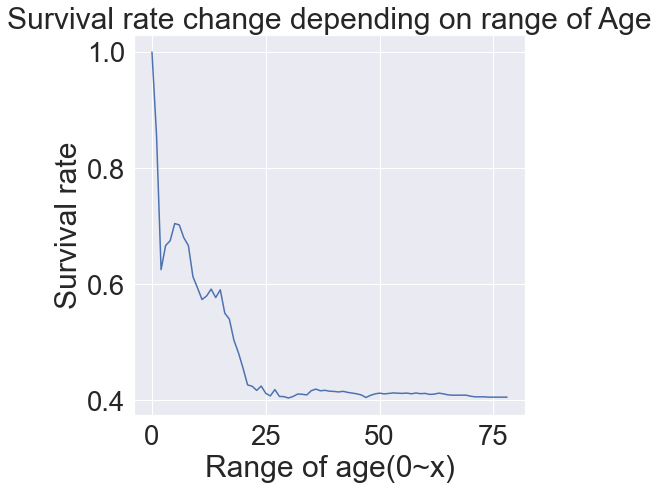

In [49]:
commulate_survival_ratio = []
for i in range(1, 80):
    commulate_survival_ratio.append(
        df_train[df_train['Age'] < i][target_label].sum()
        / len(df_train[df_train['Age'] < i][target_label])
    )
    
plt.figure(figsize=(7, 7))
plt.plot(commulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of age(0~x)')
plt.show()

<b><span style="background-color: yellow">
나이가 어릴수록 생존률이 확실히 높음    
</span></b>

## Pclass, Sex, Age

### sns.violinplot
- x 축은 나눠서 보고싶어하는 case(Pclass, Sex)
- y 축은 보고싶은 Distribution(Age)

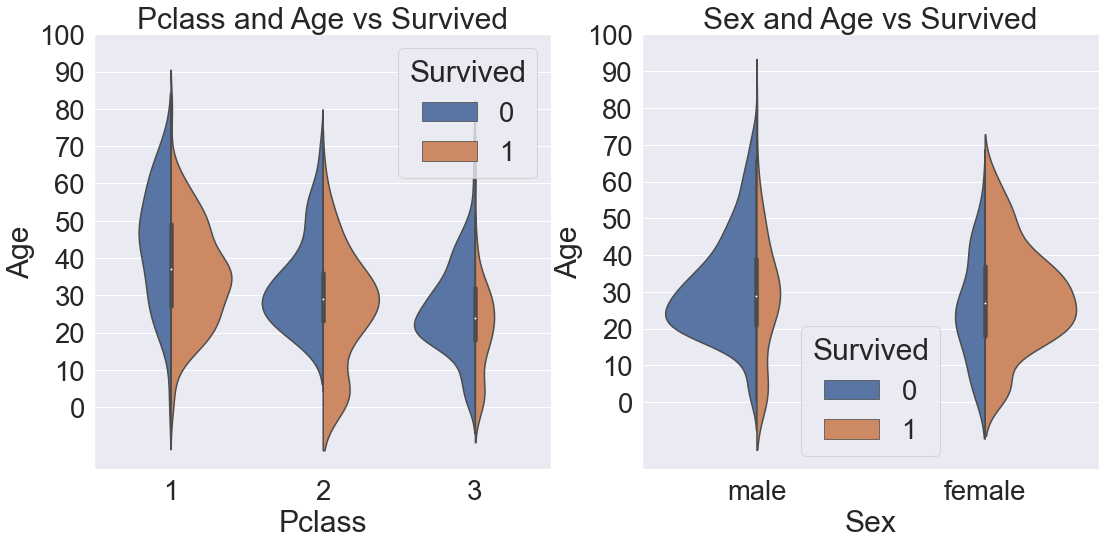

In [50]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(
    "Pclass", "Age", hue=target_label,
    data = df_train,
    scale = "count", 
    split = True,
    ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(
    "Sex", "Age", hue=target_label,
    data = df_train,
    scale = "count",
    split = True,
    ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

- 나이가 어릴수록 생존을 많이함
- 여자가 생존을 많이 함

-> <span style="background-color:pink">여성과 아이를 먼저 챙긴 것을 알 수 있음</span>

## Embarked

### 탑승한 항구에 따른 생존률

<AxesSubplot:xlabel='Embarked'>

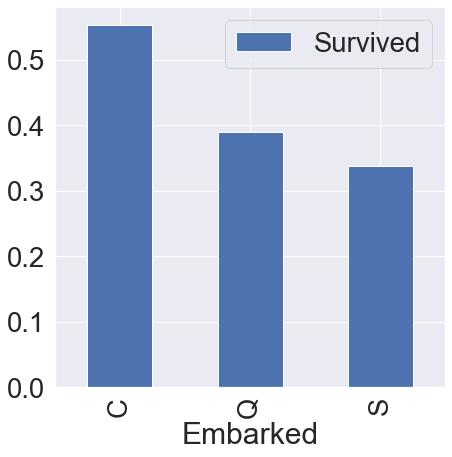

In [51]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', target_label]].groupby(
    ['Embarked'], as_index=True).mean().sort_values(
    by=target_label, ascending=False
).plot.bar(ax=ax)

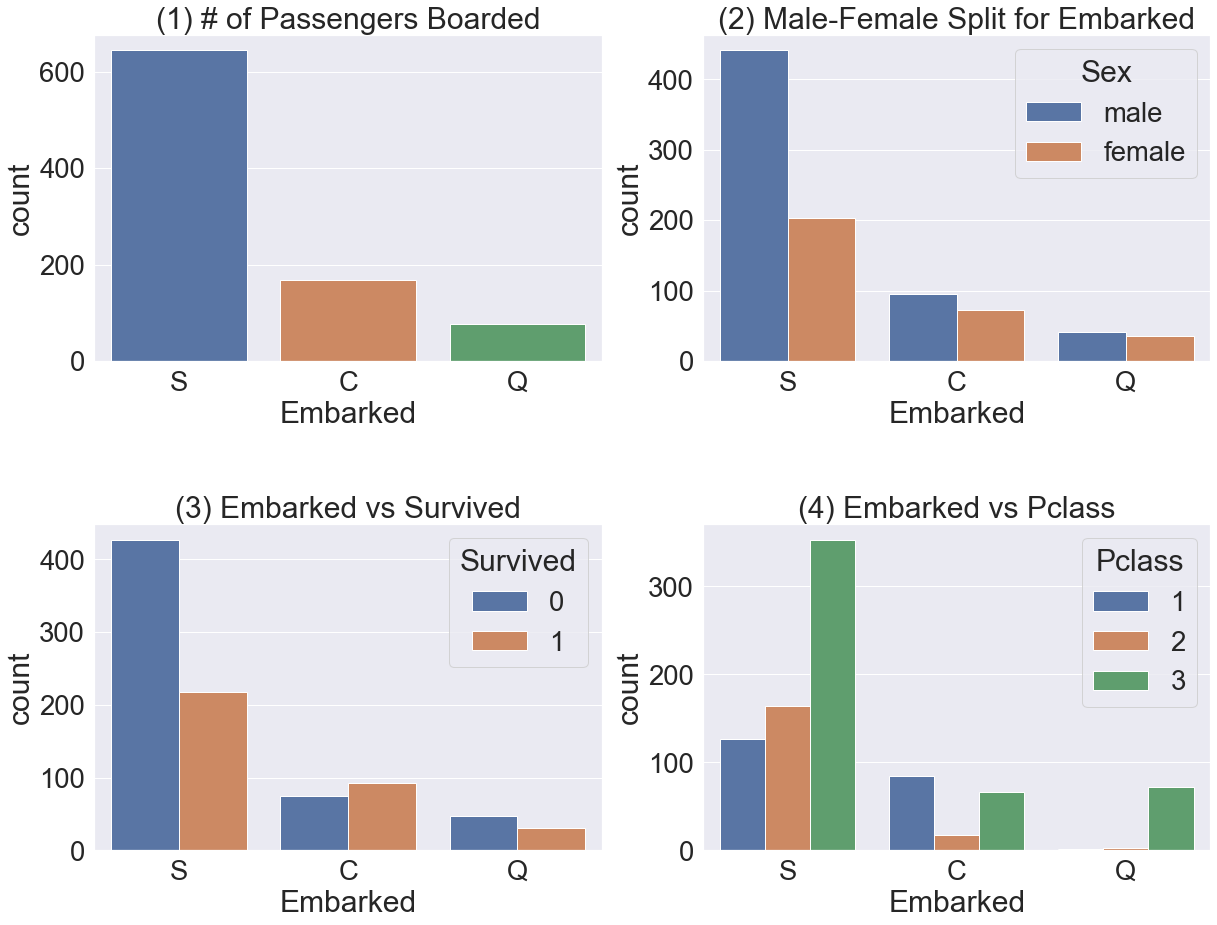

In [52]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# ax[0,0]
sns.countplot(
    'Embarked',
    data = df_train, 
    ax=ax[0,0])
ax[0,0].set_title('(1) # of Passengers Boarded')

# ax[0,1]
sns.countplot(
    'Embarked', 
    hue='Sex', 
    data=df_train, 
    ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

# ax[1,0]
sns.countplot(
    'Embarked',
    hue=target_label,
    data=df_train,
    ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

# ax[1,1]
sns.countplot(
    'Embarked',
    hue = 'Pclass', 
    data=df_train,
    ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- (1) : `S` 에서 가장 많은 사람이 탑승
- (2) : `C`, `Q` 에서 남녀의 비율이 비슷, `S`는 남자가 더 많음
- (3) : 생존확률이 `S`에서 가장 낮음
- (4) : `C`의 생존확률이 높은 것은 Pclass1이 많이 타서 그럼. `S`에서 Pclass3이 많이 타서 생존확률이 낮음

## Family - SibSp(형제, 자매), Parch(부모, 자녀)

### Sibsp 와 Parch를 합친 Family feature 생성

In [53]:
# 자신을 포함해야하니 1을 더함
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [54]:
print('Max size of Family: ', df_train['FamilySize'].max())
print('Min size of Family: ', df_train['FamilySize'].min())

Max size of Family:  11
Min size of Family:  1


### FamilySize 와 생존의 관계

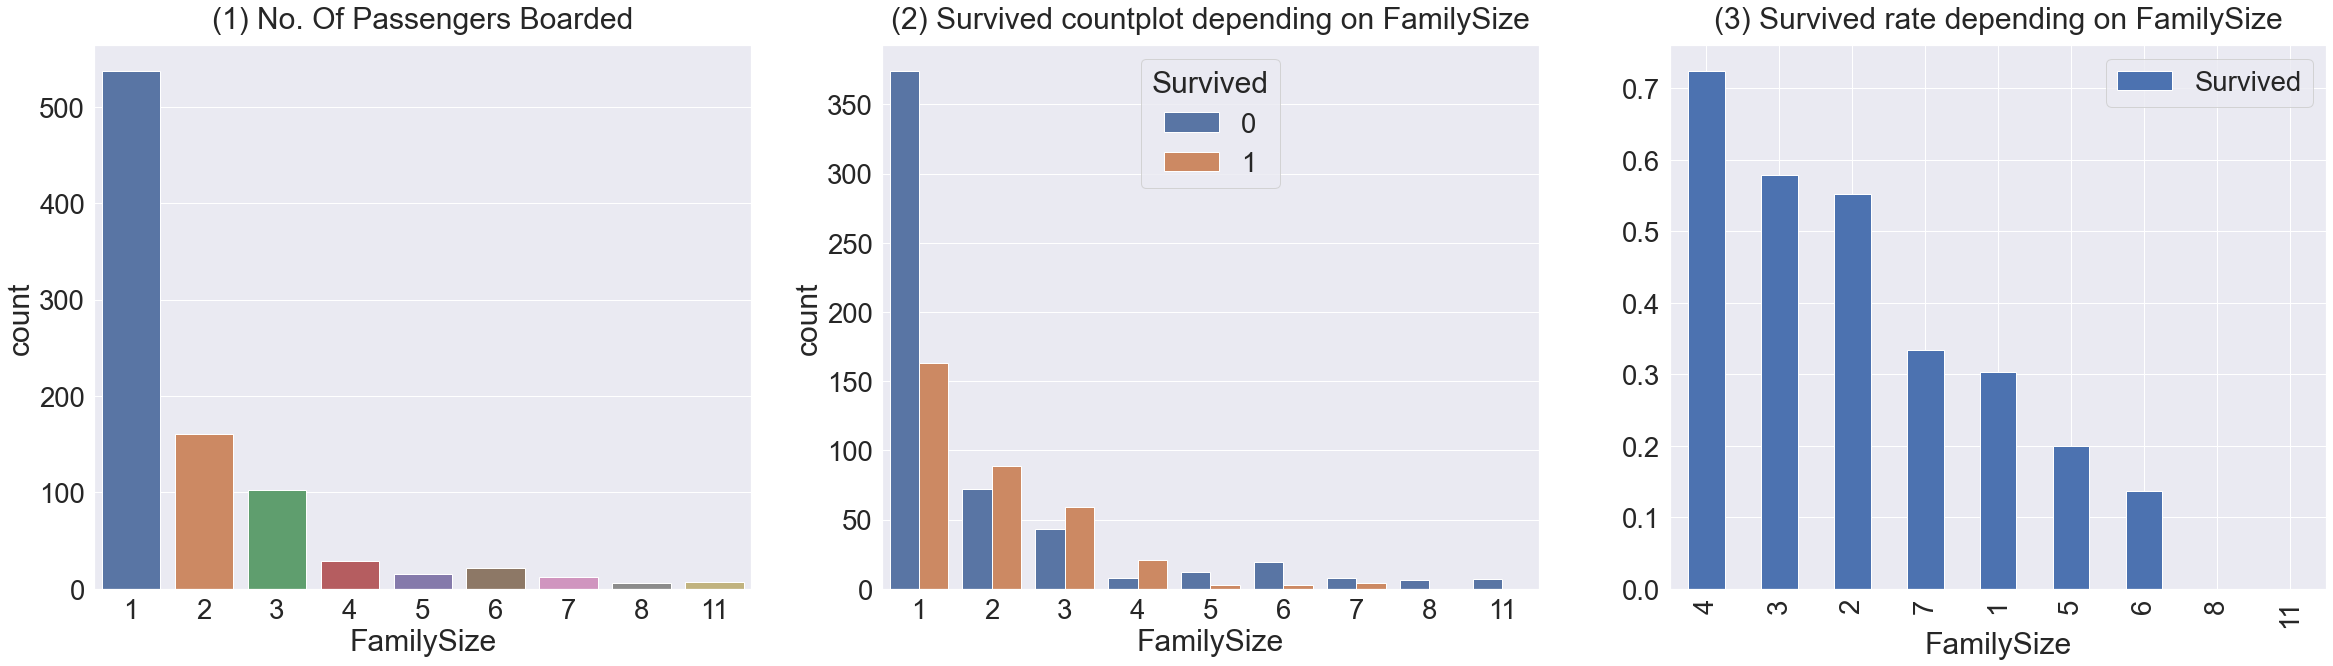

In [55]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))

# ax[0]
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

# ax[1]
sns.countplot(
    'FamilySize',
    hue=target_label, 
    data=df_train,
    ax=ax[1])
ax[1].set_title(
    '(2) Survived countplot depending on FamilySize',
    y=1.02)

# ax[2]
df_train[['FamilySize', target_label]].groupby(
    ['FamilySize'], as_index=True
).mean().sort_values(
    by=target_label, 
    ascending=False
).plot.bar(ax=ax[2])
ax[2].set_title(
    '(3) Survived rate depending on FamilySize',
    y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- (1) : 가족크기가 1~11까지 있음을 확인. 대부분 1명이고 그 다음으로 2, 3, 4명
- (2), (3) : 가족크기에 따른 생존 비교. 가족이 4명인 경우 가장 생존확률이 높음. 3-4명 선에서 생존확률이 높음

## Fare
continuous feature

### Fare Histogram(Skew, 왜도(비대칭도))

- skew = 왜도 = 비대칭도
    - 평균에 대해 최빈값이 얼마나 치우져쳐있는지를 나타내는 척도
    - 우측으로 치우칠수록 음의값(skewed to the left -> 오른쪽에 값이 더 많다, Median > Mean) 
    - 좌측으로 치우칠수록 양의값(skewed to the right -> 왼쪽에 값이 더 많다, Median < Mean)
    - 왜도 = 0(정규분포, T 분포 등 대칭인 분포, Median = Mean)

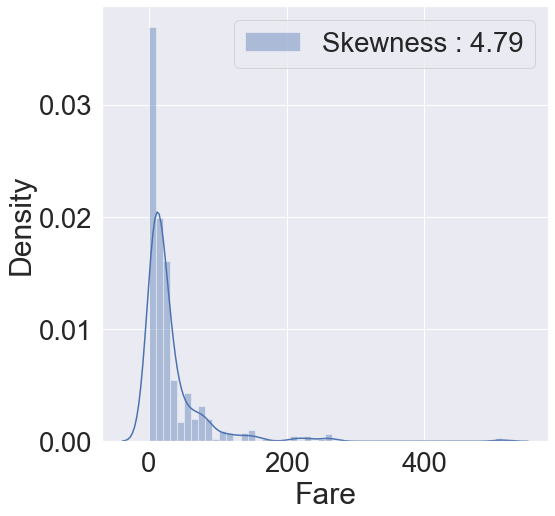

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(
    df_train['Fare'],
    color='b',
    label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),
    ax=ax
)
g = g.legend(loc='best') # 범례를 자동으로 가장 적절한 위치에 배치

- distribution 이 매우 비대칭(`high skewness`)
    - 이대로 모델에 넣어준다면 모델이 잘못 학습할 수도 있음.(Median < Mean 이므로) 
    - 예측 변수와 목표 변수가 정규 분포를 따를 때 더 신뢰할 수 있는 예측이 이루어짐.
    
#### 왜도 데이터를 처리하는 방법
1. 로그 변환(np.log)
2. 루트(제곱근) 변환(np.sqrt)
3. Box-Cox 변환(scipy.boxcox)

비대칭(skewed) 데이터는 머신러닝 모델을 엉망으로 만들 수 있음. 그렇기에 원본 데이터를 변환하는 과정이 필수적. 

#### skew 데이터 처리(log)

- 처리하기 전에 testset 에 있는 nan value 를 평균값으로 치환

In [58]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

In [59]:
df_train['Fare']= df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare']= df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

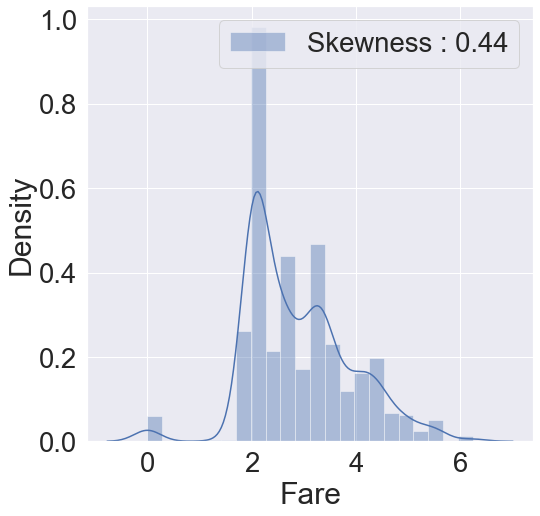

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(
    df_train['Fare'],
    color='b',
    label='Skewness : {:.2f}'.format(df_train['Fare'].skew()),
    ax = ax
)
g = g.legend(loc='best')

- log 를 취하니, 비대칭성이 많이 사라짐
- 사실 따지면, 이 부분은 `feature engineering` 에 해당하는 부분이긴 함. 

- `feature engineering`
    - 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나,
    - 새로운 feature 을 추가하는 것

## Cabin

In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [66]:
len(df_train[df_train["Cabin"].isnull()]), len(df_train)

(687, 891)

이 feature 는 NaN이 대부분이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기 쉽지 않음 <br>
그러므로, 생성하려는 모델에 포함시키지 않음

## Ticket

In [67]:
df_train['Ticket'].value_counts()

CA. 2343           7
1601               7
347082             7
3101295            6
347088             6
                  ..
SC/AH Basle 541    1
PC 17609           1
SC/PARIS 2149      1
A/5. 851           1
PC 17590           1
Name: Ticket, Length: 681, dtype: int64

<br><br>

<a id="feature-engineering"></a>
# Feature Engineering
- Feature Engineering은 실제 모델의 학습에 사용하려는 것이므로, trainset 뿐만 아니라 testset 에도 똑같이 적용해줘야 함. 

## Fill Null
- 가장 먼저, dataset에 존재하는 null data를 채운다.
- null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 짜내어 채울 수 있음
- null data를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지 될 수 있기 때문에 신경써줘야 함

### Fill Null in Age using title

In [71]:
len(df_train[df_train['Age'].isnull()])

177

-> 177개의 null data

- title(Miss, Mr, Mrs) + statistics 로 채우는 전략을 이용

In [72]:
df_train['Name'].value_counts()

Perreault, Miss. Anne                     1
Nenkoff, Mr. Christo                      1
Beane, Mr. Edward                         1
Coutts, Master. William Loch "William"    1
Vande Walle, Mr. Nestor Cyriel            1
                                         ..
Silverthorne, Mr. Spencer Victor          1
Hansen, Mr. Claus Peter                   1
Coxon, Mr. Daniel                         1
Harknett, Miss. Alice Phoebe              1
Sage, Miss. Stella Anna                   1
Name: Name, Length: 891, dtype: int64

- Initial column에 title 저장

In [73]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

#### pd.crosstab 을 이용한 Initial 과 Sex 간의 count

In [74]:
pd.crosstab(
    df_train['Initial'],
    df_train['Sex']
).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [75]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [76]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<span style="background-color:yellow">여성과 관계있는 Miss, Mrs 가 생존률이 높다. </span>

<AxesSubplot:xlabel='Initial'>

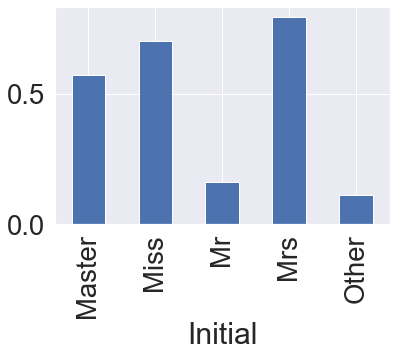

In [77]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

#### Age의 평균을 이용해 Null Value 를 채움

In [79]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [80]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

참고) null value 를 채우는 다른 다양한 방법
- https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling 

### Fill Null in Embarked

In [82]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


Embarked feature 는 2개의 Null value 가 있고, 간단하게 S로 채움(S에서 가장 많은 탑승객이 있었으므로)

In [83]:
df_train['Embarked'].fillna('S', inplace=True)

## Change Age(continuous to categorical)

Age 는 현재 continuous feature 
- 이대로 써도 모델을 세울 수 있지만, 몇개의 group으로 나누어 category화 시켜줄 수도 있음
- continuous -> categorical = information loss가 생길수도 있지만, 다양한 방법을 경험해보기 위해 진행함.
<br>

### continuous -> categorical
- df의 indexing 방법인 loc를 이용하여 직접 
- apply 사용

#### 10살 간격으로 나눔

In [84]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

#### 간단한 함수를 만들어 apply 함수 사용

In [85]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

- all() : Series 간 boolean 비교 후 모든 값이 같으면 True

In [86]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True ->', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True -> True


In [87]:
# 중복되는 컬럼, Age 컬럼 제거

df_train.drop(
    ['Age', 'Age_cat_2'],
    axis=1, 
    inplace=True
)
df_test.drop(['Age'], axis=1, inplace=True)

## Change Initial, Embarked and Sex(string to numerical)

### Initial (categorical -> numerical)

- Initial feature 값은 Mr, Mrs, Miss, Master, Other 총 5개로 카테고리 값인데, 이런 카테고리로 되어져 있는 값은 모델에 넣어주기 전에 컴퓨터가 인식할 수 있도록 수치화 시켜야 함.

In [88]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

### Embarked (categorical -> numerical)

In [89]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [90]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [91]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [92]:
df_train['Embarked'].isnull().any()

False

### Sex (categorical -> numerical)

In [93]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

## Pearson Correlation

- -1로 갈수록 음의 상관관계
- 1로 갈수록 양의 상관관계

-> df.corr() 메소드와 seaborn 을 가지고 편하게 그릴 수 있음

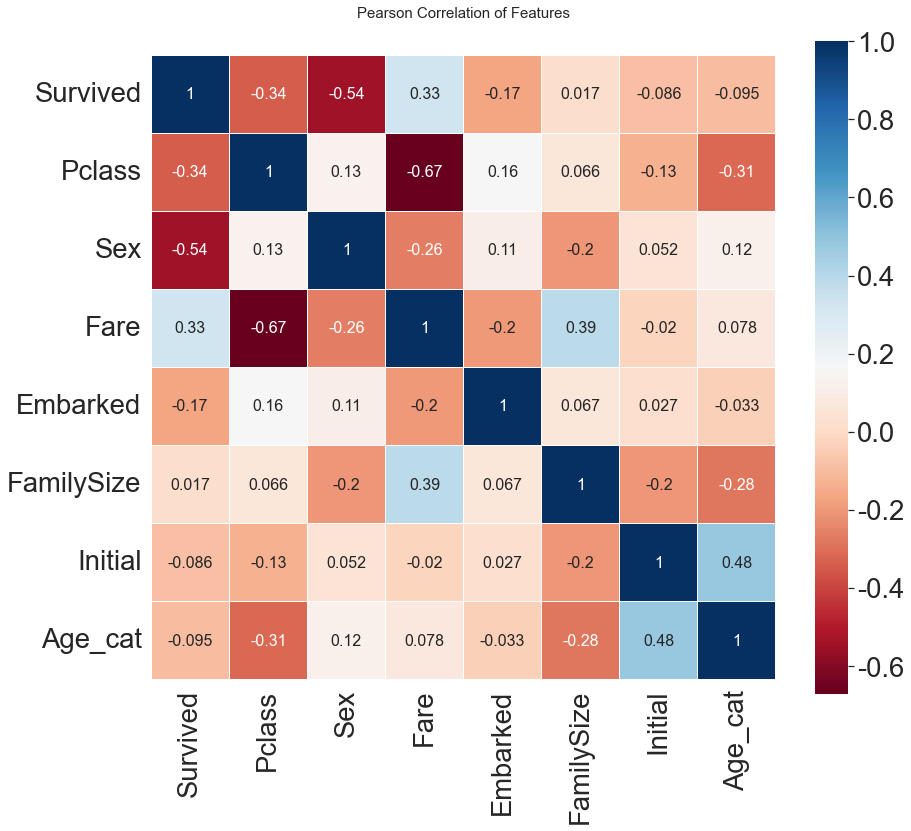

In [94]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y = 1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":16})

del heatmap_data

- EDA에서 살펴봤듯이, Sex와 Pclass가 Survived 에 상관관계가 어느정도 있음을 알 수 있음.
- Fare과 Embarked 도 상관관계가 있음
- 서로 강한 상관관계를 가지는 feature 가 없음. -> 이는 모델을 학습시킬 때, 불필요한 feature가 없다는 것을 의미
    - 1 또는 -1의 상관관계를 가진 feature A, B가 있다면, 얻을 수 있는 정보는 사실 하나일테니까
   

## One-hot encoding on Initial and Embarked
- 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄수도 있음
- 아래와 같이 (0,1)로 이루어진 5차원의 벡터로 나타내는 것을 의미

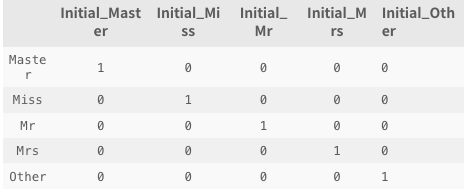

-> pd.get_dummies를 이용하면 쉽게 만들 수 있음

### Initial

In [96]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [97]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


- 총 5개의 카테고리였으니, one-hot encoding 후에는 새로운 5개의 column이 생겨남

### Embarked

In [98]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

## Drop columns

In [99]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [100]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [101]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


<br><br>

<a id="building-machine-learning"></a>
# Building machine learning model and prediction using the trained model
sklearn 을 사용해 머신러닝 모델 생성

## import

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델의 평가를 위해서 사용
from sklearn.model_selection import train_test_split # training set을 쉽게 나눠주는 함수

## Preparation - Split dataset into train, valid, test set

가장 먼저, 학습에 쓰일 데이터와, target label(Survived) 를 분리

In [103]:
X_train = df_train.drop(target_label, axis = 1).values
target_label = df_train[target_label].values
X_test = df_test.values

축구대표팀이 팀훈련(train)을 하고 바로 월드컵(test)로 나가는 것이 아니라, <br>
팀훈련(train)을 한 다음 평가전(valid)를 거쳐 팀의 훈련 정도(학습정도)를 확인하고 월드컵(test)에 나가는 것과 비슷

In [104]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

### Random Forest
- 이 튜토리얼에서는 랜덤포레스트 모델을 사용
- 결정기반 모델
- 여러 결정 트리들을 앙상블한 모델
- 각 머신러닝 알고리즘에는 여러 파라미터가 있음. 이것들이 어떻게 세팅되냐에 따라 모델의 성능이 달라짐
- 이 튜토리올에서는 파라미터 튜닝은 하지 않고, default 세팅으로 진행

## Model generation and prediction

In [105]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [106]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.84% 정확도로 생존을 맞춤


## Feature importance
- 학습된 모델은 feature importance 를 가짐. 
- 이런 feature importance를 확인하여 지금 만든 모델이 어떤 feature에 영향을 받았는지 확인 가능

In [107]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

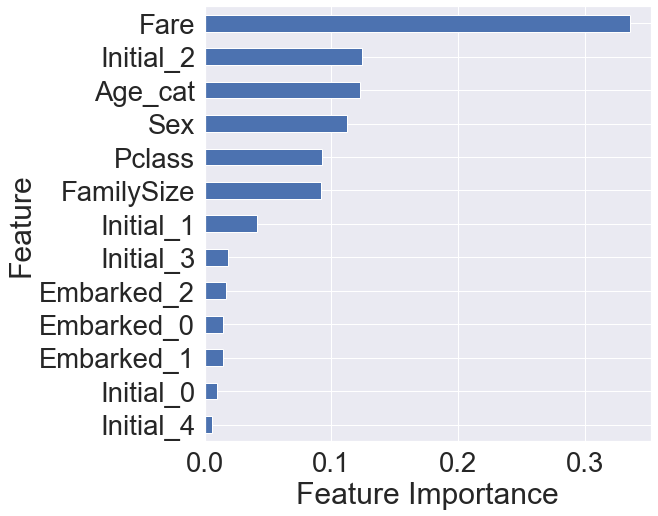

In [108]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

- feature importance 를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection 을 할수도 있고, 좀 더 빠른 모델을 위해 feature를 제거할 수도 있음

## Prediction on Test set
- 이제 모델이 학습하지 않았던(보지 않았떤) 테스트셋을 모델에 주어서, 생존여부를 예측

In [109]:
submission = pd.read_csv("./data/titanic/gender_submission.csv")

In [110]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [111]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [112]:
submission.to_csv('./data/titanic/titanic_submission1.csv', index=False)